# Importing Libraries/Reading in Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('Data/Prem-Tomorrowland_posts_11-16.csv')
df.head()

,title,selftext,subreddit,created_utc
0,Genreverse,"Hi everyone, \n\nHere at Genreverse our ultima...",Tomorrowland,1637031457
1,Tomorrowland and it's bass line-up,So obviously Tomorrowland has always had a gre...,Tomorrowland,1637002849
2,Hand crafts 2021,NaN,Tomorrowland,1636935255
3,Winter TML lodging,hello! I have the 4 day pass without lodging a...,Tomorrowland,1636922669
4,Was Tomorrowland around the world 2020 a speci...,NaN,Tomorrowland,1636904090


In [3]:
df.shape

(2000, 4)

---

# Cleaning/Preprocessing/EDA

### Cleaning/Creating Length Columns

In [4]:
df.isnull().sum()

title            0
selftext       885
subreddit        0
created_utc      0
dtype: int64

In [5]:
df[(df['selftext'].isnull()) & (df['subreddit'] == 'PremierLeague')].shape

(434, 4)

In [6]:
df[(df['selftext'].isnull()) & (df['subreddit'] == 'Tomorrowland')].shape
# almost even split of null values in selftext column between Tomorrowland and Premier League Reddits

(451, 4)

In [7]:
df[df['selftext'] == '']

,title,selftext,subreddit,created_utc


In [8]:
df['selftext'].fillna('', inplace=True)  # focusing on titles in this notebook, so not worried about these nulls

In [9]:
length = []
for i in df['title']:
    length.append(len(i))
    
df['title_length'] = length

In [10]:
num_words = []
for i in df['title']:
    num_words.append(len(i.split()))

df['title_word_count'] = num_words

In [11]:
df.head()

,title,selftext,subreddit,created_utc,title_length,title_word_count
0,Genreverse,"Hi everyone, \n\nHere at Genreverse our ultima...",Tomorrowland,1637031457,10,1
1,Tomorrowland and it's bass line-up,So obviously Tomorrowland has always had a gre...,Tomorrowland,1637002849,34,5
2,Hand crafts 2021,,Tomorrowland,1636935255,16,3
3,Winter TML lodging,hello! I have the 4 day pass without lodging a...,Tomorrowland,1636922669,18,3
4,Was Tomorrowland around the world 2020 a speci...,,Tomorrowland,1636904090,60,9


In [12]:
df.groupby('subreddit').mean()[['title_length', 'title_word_count']]

,title_length,title_word_count
subreddit,,
PremierLeague,61.019,10.807
Tomorrowland,47.623,8.171


**Premier Leauge posts tend to have longer titles than Tomorrowland posts on average.**

In [13]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(df['title'])
title_cvec = cvec.transform(df['title'])

In [14]:
title_words = pd.DataFrame(title_cvec.todense(), columns=cvec.get_feature_names())
title_words

,00,000,007,00a,05,06,07,08,09,10,...,zrfj,ខភ,គជ,𝗕𝗼𝘂𝗻𝗱𝗮𝗿𝗶𝗲𝘀,𝗕𝗿𝗲𝗮𝗸𝗶𝗻𝗴,𝗤𝗼𝗻𝘁𝗶𝗻𝗲𝗻𝘁,𝗧𝗵𝗲,𝗽𝗼𝘀𝘁𝗽𝗼𝗻𝗲𝗱,𝘁𝗼,𝟮𝟬𝟮𝟮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
title_words['which_sub'] = df['subreddit']

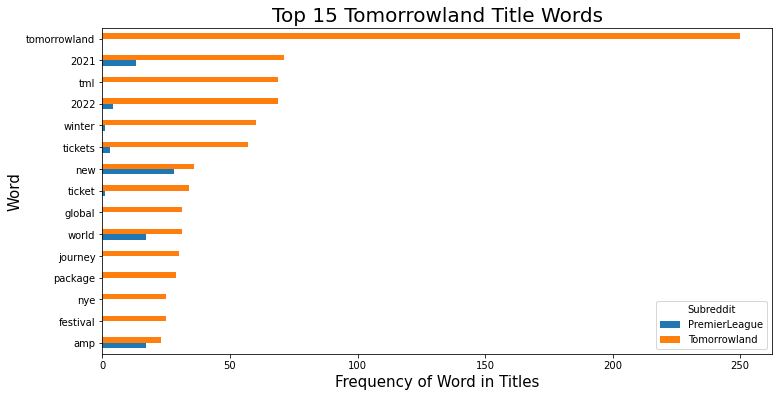

In [16]:
ax = title_words.groupby('which_sub').sum().T.sort_values('Tomorrowland', ascending=False).head(15).sort_values('Tomorrowland').plot(kind='barh', figsize=(12,6))
plt.title('Top 15 Tomorrowland Title Words', size=20)
plt.xlabel('Frequency of Word in Titles', size=15)
plt.ylabel('Word', size=15)
ax.legend(title='Subreddit', labels=("PremierLeague","Tomorrowland"))
plt.savefig('./Visuals/top15tomo_title_words.png', bbox_inches='tight');
plt.show();

*Of the top words, not very many seem to similar so hopefully the model should be able to predict subreddits with high accuracy*

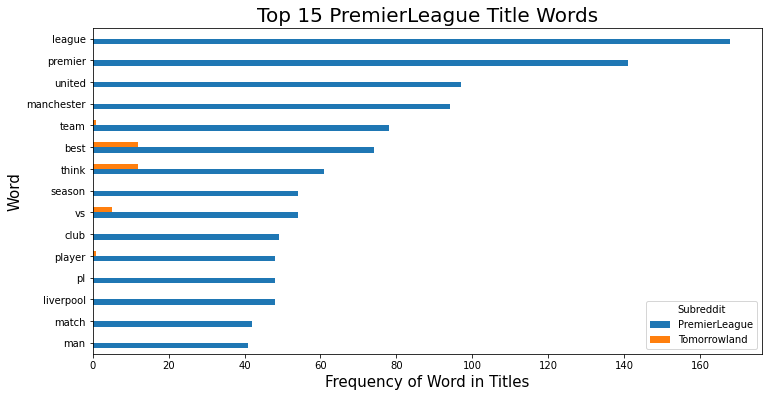

In [17]:
ax = title_words.groupby('which_sub').sum().T.sort_values('PremierLeague', ascending=False).head(15).sort_values('PremierLeague').plot(kind='barh', figsize=(12,6))
plt.title('Top 15 PremierLeague Title Words', size=20)
plt.xlabel('Frequency of Word in Titles', size=15)
plt.ylabel('Word', size=15)
ax.legend(title='Subreddit', labels=("PremierLeague","Tomorrowland"))
plt.savefig('./Visuals/top15prem_title_words.png', bbox_inches='tight');
plt.show();

*Of the top words, not very many seem to similar so hopefully the model should be able to predict subreddits with high accuracy*

In [18]:
titles_and_words = pd.merge(df, title_words, on=df.index)
titles_and_words.drop(columns='key_0', inplace=True)

In [19]:
titles_and_words.head(2)

,title_x,selftext,subreddit_x,created_utc,title_length,title_word_count,00,000,007,00a,...,ខភ,គជ,𝗕𝗼𝘂𝗻𝗱𝗮𝗿𝗶𝗲𝘀,𝗕𝗿𝗲𝗮𝗸𝗶𝗻𝗴,𝗤𝗼𝗻𝘁𝗶𝗻𝗲𝗻𝘁,𝗧𝗵𝗲,𝗽𝗼𝘀𝘁𝗽𝗼𝗻𝗲𝗱,𝘁𝗼,𝟮𝟬𝟮𝟮,which_sub
0,Genreverse,"Hi everyone, \n\nHere at Genreverse our ultima...",Tomorrowland,1637031457,10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Tomorrowland
1,Tomorrowland and it's bass line-up,So obviously Tomorrowland has always had a gre...,Tomorrowland,1637002849,34,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Tomorrowland


In [20]:
prem_titlewords = titles_and_words[titles_and_words['subreddit_x'] == 'PremierLeague'].drop(columns=['title_x', 'selftext', 
                                                                                                    'subreddit_x', 'created_utc',
                                                                                                    'title_length', 'title_word_count',
                                                                                                    'which_sub'])
top15_prem_titlewords = prem_titlewords.sum().sort_values(ascending=False).head(15)
top15_prem_titlewords

league        168
premier       141
united         97
manchester     94
team           78
best           74
think          61
vs             54
season         54
club           49
liverpool      48
pl             48
player         48
match          42
man            41
dtype: int64

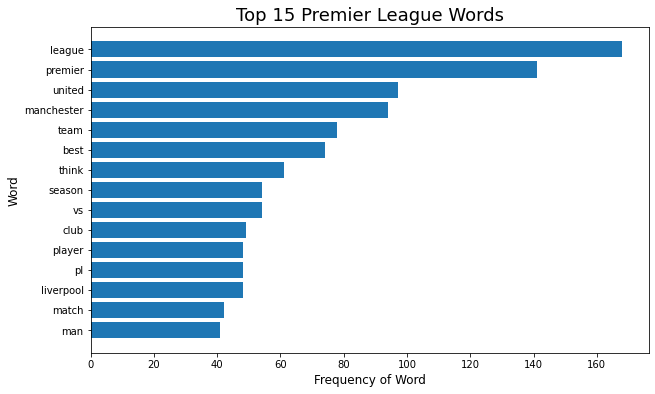

In [21]:
plt.figure(figsize=(10,6))
plt.title('Top 15 Premier League Words', size=18)
plt.ylabel('Word', size=12)
plt.xlabel('Frequency of Word', size=12)
plt.barh(y=top15_prem_titlewords.sort_values().index, width=top15_prem_titlewords.sort_values());

In [22]:
tomo_titlewords = titles_and_words[titles_and_words['subreddit_x'] == 'Tomorrowland'].drop(columns=['title_x', 'selftext', 
                                                                                                    'subreddit_x', 'created_utc',
                                                                                                    'title_length', 'title_word_count', 
                                                                                                   'which_sub'])
top15_tomo_titlewords = tomo_titlewords.sum().sort_values(ascending=False).head(15)
top15_tomo_titlewords

tomorrowland    250
2021             71
2022             69
tml              69
winter           60
tickets          57
new              36
ticket           34
world            31
global           31
journey          30
package          29
festival         25
nye              25
amp              23
dtype: int64

<BarContainer object of 15 artists>

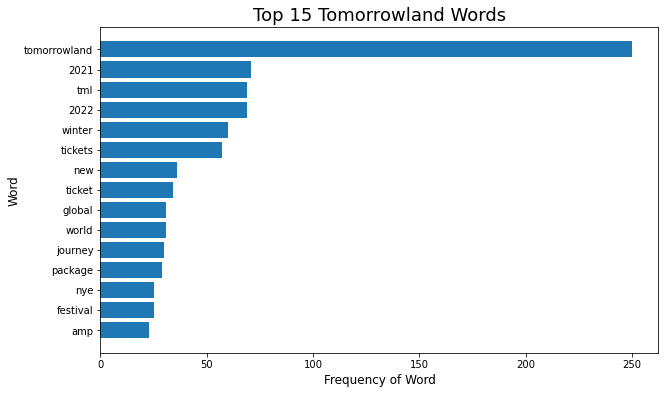

In [23]:
plt.figure(figsize=(10,6))
plt.title('Top 15 Tomorrowland Words', size=18)
plt.ylabel('Word', size=12)
plt.xlabel('Frequency of Word', size=12)
plt.barh(y=top15_tomo_titlewords.sort_values().index, width=top15_tomo_titlewords.sort_values())

---

# Models

### Model Preparation

In [24]:
df['subreddit'] = df['subreddit'].map({'Tomorrowland': 0, 'PremierLeague': 1})
# target column created

In [25]:
X = df['title']
y = df['subreddit']

In [26]:
y.value_counts(normalize=True)
# baseline accuracy of 50% if predicting subreddit is from Premier League subreddit <- looking to beat this

0    0.5
1    0.5
Name: subreddit, dtype: float64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

---

### Model 1 - KNN with CountVectorizer

In [28]:
pipe1 = Pipeline([
    ('cvec', CountVectorizer()),
    ('knn', KNeighborsClassifier())
])

In [29]:
params1 = {
    'cvec__min_df': [8, 9, 10],
    'cvec__max_df': [.1, .2, .3],
    'cvec__binary': [True, False],
    'cvec__stop_words': [None, 'english'],
    'knn__weights': ['uniform', 'distance']
}

In [30]:
gs1 = GridSearchCV(pipe1, param_grid=params1)
gs1.fit(X_train, y_train)
print(gs1.best_score_)
gs1.best_params_

0.834


{'cvec__binary': False,
 'cvec__max_df': 0.2,
 'cvec__min_df': 9,
 'cvec__stop_words': 'english',
 'knn__weights': 'distance'}

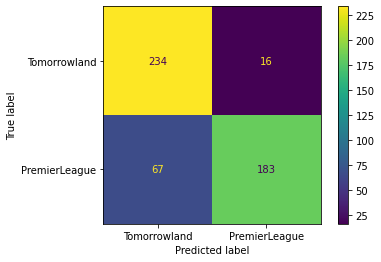

In [31]:
cm1 = metrics.plot_confusion_matrix(gs1, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])
plt.savefig('./Visuals/worst_title_cm.png', bbox_inches='tight')
plt.show(cm1)

In [32]:
preds1 = gs1.predict(X_test)
tn1, fp1, fn1, tp1 = metrics.confusion_matrix(y_test, preds1).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland titles?**

In [33]:
tn1 / (tn1 + fp1)   # Model was very good at predicting subreddit if title came from Tomorrowland

0.936

**Sensitivity - How good did the model perform at predicting Premier League titles?**

In [34]:
tp1 / (tp1 + fn1)   # Model was not as good at predicting subreddit if title came from Premier League

0.732

In [35]:
preds1 = gs1.predict(X_test)
X_test[(y_test != preds1) & (preds1 == 0)].head(60)

1778                           Someone explain this to me
1605                     Online Career Mode - FIFA 22 XB1
1571                      Breakdown of annual squad wages
1024    Ward-prowse, TAA, and Maddison, who are you ta...
1295                              Proper baller. Deserved
1919                       Please subscribe to my channel
1641                                    Pretty much this!
1981                                                Salah
1797                               Heung-min Son or Kane?
1228    A commanding performance or a open-ended thril...
1459    Which are the most unexpected signings in rece...
1574    Word is circulating that managers love it at S...
1062    Anyone else fed up of 3pm games not being tele...
1560        Do you guys have a second team? Who are they?
1290    Former wonder kids who failed to live up to th...
1409                                    I'm fed up of FSG
1317    Seems you lot appreciated the last one I poste...
1074          

In [36]:
X_test[(y_test != preds1) & (preds1 == 1)].head(16)

821    I really hope Martin Garrix features whoever m...
504                            Good luck getting refunds
240                                 Can i still buy tix?
270                                     Change time zone
560    Buy Xanax Online without Prescription for Anxi...
805    The best time of my life deserves to be on my ...
492                          Time to make legal steps...
267    One of the best ways to watch: with Philips Hu...
738            Some of the best memories of my lifetyme!
373    Did your heard about the new electronic versio...
847                                   Good time at B.Eat
64                                    Best treasure case
953                  Can I Watch On IOS ?! (PLEASE HELP)
410    Workin' on my stage Name for 2024. Lmk what yo...
944    When you change the 31.12.2020 timezone, you s...
418            Can I stay the entire week at dreamville?
Name: title, dtype: object

In [37]:
pred1_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': gs1.predict_proba(X_test)[:,1]})

pred1_df.head()

,true_values,pred_probs
1370,1,0.800000
654,0,0.000000
1778,1,0.200000
646,0,0.320377
1171,1,1.000000


C:\Users\ao322\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


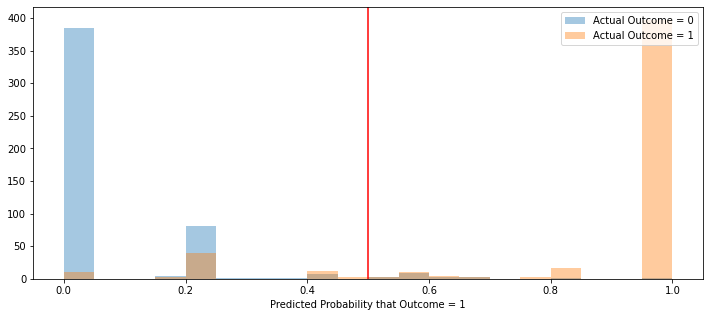

In [38]:
plt.figure(figsize = (12, 5))

# code from classification metrics lecture ii
for group in pred1_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = [f'Actual Outcome = {group[0]}'])

plt.axvline(y.mean(), color='r')
plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

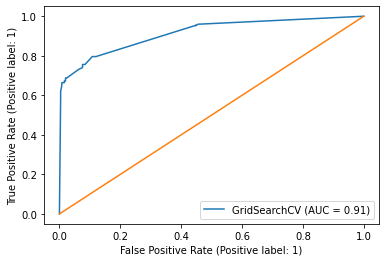

In [39]:
# ROC curve for Model 1
metrics.plot_roc_curve(gs1, X_test, y_test)
# worst case scenario line
plt.plot([0,1], [0,1], label='Baseline');

---

### Model 2 - KNN with TFIDF

In [40]:
pipe2 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

In [41]:
params2 = {
    'tvec__stop_words': ['english', None],
    'tvec__min_df': [7, 8, 9],
    'tvec__max_df': [.1, .2, .3],
    'tvec__ngram_range': [(1,1), (1,2)],
    'knn__weights': ['uniform', 'distance']
}

In [42]:
gs2 = GridSearchCV(pipe2, param_grid=params2)
gs2.fit(X_train, y_train)
print(gs2.best_score_)
gs2.best_params_

0.8453333333333333


{'knn__weights': 'uniform',
 'tvec__max_df': 0.2,
 'tvec__min_df': 8,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': 'english'}

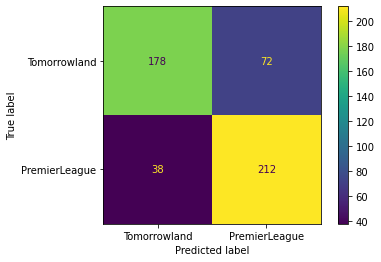

In [43]:
cm2 = metrics.plot_confusion_matrix(gs2, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])
plt.show(cm2)

In [44]:
preds2 = gs2.predict(X_test)
tn2, fp2, fn2, tp2 = metrics.confusion_matrix(y_test, preds2).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland titles?**

In [45]:
tn2 / (tn2 + fp2)   # Model was not good at predicting subreddit if title came from Tomorrowland

0.712

**Sensitivity - How good did the model perform at predicting Premier League titles?**

In [46]:
tp2 / (tp2 + fn2)   # Model was good at predicting subreddit if title came from Premier League

0.848

In [47]:
preds2 = gs2.predict(X_test)
X_test[(y_test != preds2) & (preds2 == 0)].head(38)

1167    Are there any PL manager who got sacked but re...
1333    I've rewatched the Chelsea-Tottenham game back...
1459    Which are the most unexpected signings in rece...
1560        Do you guys have a second team? Who are they?
1724               Match, Team and Player of the weekend!
1290    Former wonder kids who failed to live up to th...
1748    Do you think Suarez would get away with this t...
1954                                         Need a chant
1050    A video providing a surface level breakdown of...
1176    Premier League clubs set to benefit from three...
1684    If Conte steadies the ship &amp; wins a title ...
1294    Remember that Wilshere “golaço” vs Norwich? It...
1404    How good/ bad of a manager really is Ole when ...
1328                           God I love Moyes's Westham
1776        Having a debate with a fellow Liverpool fan .
1179    Pogba is ready to take a pay cut to return to ...
1304    If ole stays till the end of the season what c...
1659    Who wa

In [48]:
X_test[(y_test != preds2) & (preds2 == 1)].head(60)

484                                                22:00
566                                   NFTb Bot @nftb_bot
35                                        tcka tcka tcka
156                                          Golden flag
700    +++UPDATE+++ So, my mom painted me ODESZA's "A...
233                                           HornyGirls
686    Let's gooooo!!!! Finally something to look for...
504                            Good luck getting refunds
937                         Static / distortion via hdmi
639                                            yuutatinn
224                                          Moto racing
472                                     Changing address
794               Every day I try not to think about TML
642                                  These took too long
981                                  Talk about details!
553                                SOCIAL MEDIA MANAGING
508                                       Miracle items?
803                            

In [49]:
pred2_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': gs2.predict_proba(X_test)[:,1]})

pred2_df.head()

,true_values,pred_probs
1370,1,0.8
654,0,0.2
1778,1,0.8
646,0,0.2
1171,1,1.0


C:\Users\ao322\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


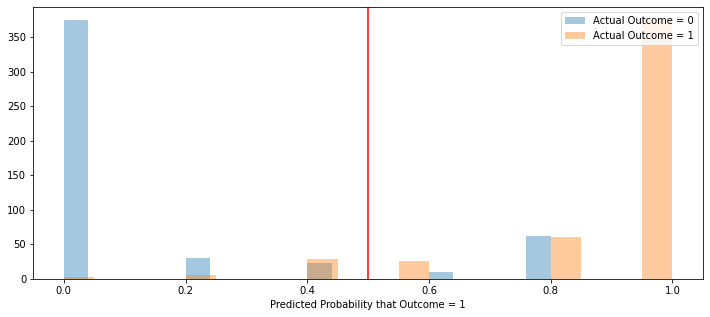

In [50]:
plt.figure(figsize = (12, 5))

# code from classification metrics lecture ii
for group in pred2_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = [f'Actual Outcome = {group[0]}'])

plt.axvline(y.mean(), color='r')
plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

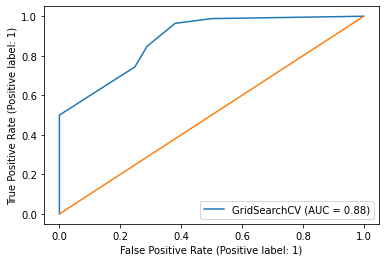

In [51]:
# ROC curve for Model 2
metrics.plot_roc_curve(gs2, X_test, y_test)
# worst case scenario line
plt.plot([0,1], [0,1], label='Baseline');

---

### Model 3 - Logistic Regression with CountVectorizer

In [52]:
pipe3 = Pipeline([
    ('cvec', CountVectorizer()),
    ('logreg', LogisticRegression())
])

In [53]:
params3 = {
    'cvec__min_df': [2, 3, 4, 5, 6],
    'cvec__max_df': [.1, .2, .3],
    'cvec__binary': [True, False],
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range': [(1,1), (1,2)],
    'logreg__C': [1, 2, 3]
}

In [54]:
gs3 = GridSearchCV(pipe3, param_grid=params3)
gs3.fit(X_train, y_train)
print(gs3.best_score_)
gs3.best_params_

0.898


{'cvec__binary': False,
 'cvec__max_df': 0.2,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english',
 'logreg__C': 2}

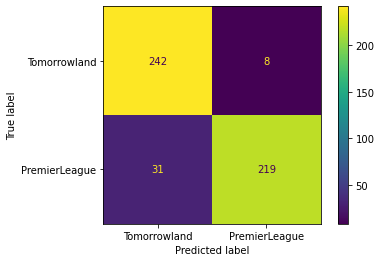

In [55]:
cm3 = metrics.plot_confusion_matrix(gs3, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])
plt.show(cm3)

In [56]:
preds3 = gs3.predict(X_test)
tn3, fp3, fn3, tp3 = metrics.confusion_matrix(y_test, preds3).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland titles?**

In [57]:
tn3 / (tn3 + fp3)   # Model was very good at predicting subreddit if title came from Tomorrowland

0.968

**Sensitivity - How good did the model perform at predicting Premier League titles?**

In [58]:
tp3 / (tp3 + fn3)   # Model was good at predicting subreddit if title came from Premier League

0.876

In [59]:
preds3 = gs3.predict(X_test)
X_test[(y_test != preds3) & (preds3 == 0)].head(31)

1778                           Someone explain this to me
1605                     Online Career Mode - FIFA 22 XB1
1024    Ward-prowse, TAA, and Maddison, who are you ta...
1295                              Proper baller. Deserved
1919                       Please subscribe to my channel
1641                                    Pretty much this!
1228    A commanding performance or a open-ended thril...
1459    Which are the most unexpected signings in rece...
1290    Former wonder kids who failed to live up to th...
1409                                    I'm fed up of FSG
1317    Seems you lot appreciated the last one I poste...
1954                                         Need a chant
1214                             Can someone explain ffp?
1626                                     Pure masterclass
1136             Reece James or Trent Alexander Arnold???
1004    Hwang Hee-chan: Had a chat with Shin Joo-hyun ...
1328                           God I love Moyes's Westham
1668          

In [60]:
X_test[(y_test != preds3) & (preds3 == 1)].head(8)

686    Let's gooooo!!!! Finally something to look for...
805    The best time of my life deserves to be on my ...
492                          Time to make legal steps...
267    One of the best ways to watch: with Philips Hu...
339    Anyone Know what camping is dis? I've never se...
847                                   Good time at B.Eat
64                                    Best treasure case
418            Can I stay the entire week at dreamville?
Name: title, dtype: object

In [61]:
pred3_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': gs3.predict_proba(X_test)[:,1]})

pred3_df.head()

,true_values,pred_probs
1370,1,0.865643
654,0,0.055751
1778,1,0.316927
646,0,0.211946
1171,1,0.991122


C:\Users\ao322\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


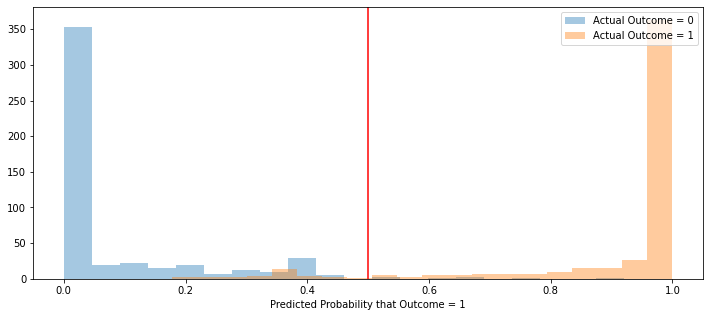

In [62]:
plt.figure(figsize = (12, 5))

# code from classification metrics lecture ii
for group in pred3_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = [f'Actual Outcome = {group[0]}'])

plt.axvline(y.mean(), color='r')
plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

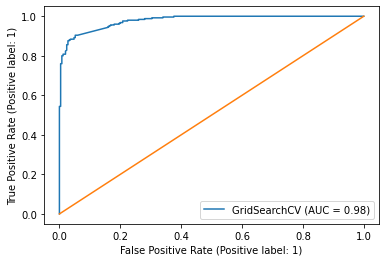

In [63]:
# ROC curve for Model 3
metrics.plot_roc_curve(gs3, X_test, y_test)
# worst case scenario line
plt.plot([0,1], [0,1], label='Baseline');

---

### Model 4 - Logistic Regression with TFIDF

In [64]:
pipe4 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('logreg', LogisticRegression())
])

In [65]:
params4 = {
    'tvec__stop_words': [None, 'english'],
    'tvec__min_df': [1, 2, 3, 4, 5],
    'tvec__max_df': [.2, .3, .4],
    'tvec__ngram_range': [(1,1), (1,2)],
    'logreg__C': [1, 2, 3]
}

In [66]:
gs4 = GridSearchCV(pipe4, param_grid=params4)
gs4.fit(X_train, y_train)
print(gs4.best_score_)
gs4.best_params_

0.9113333333333333


{'logreg__C': 1,
 'tvec__max_df': 0.2,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

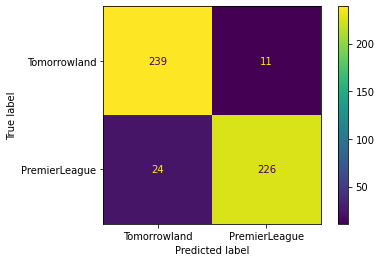

In [67]:
cm4 = metrics.plot_confusion_matrix(gs4, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])
plt.savefig('./Visuals/top_title_cm.png', bbox_inches='tight')
plt.show(cm4)

In [68]:
preds4 = gs4.predict(X_test)
tn4, fp4, fn4, tp4 = metrics.confusion_matrix(y_test, preds4).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland titles?**

In [69]:
tn4 / (tn4 + fp4)   # Model was very good at predicting subreddit if title came from Tomorrowland

0.956

**Sensitivity - How good did the model perform at predicting Premier League titles?**

In [70]:
tp4 / (tp4 + fn4)   # Model was very good at predicting subreddit if title came from Premier League

0.904

In [71]:
preds4 = gs4.predict(X_test)
X_test[(y_test != preds4) & (preds4 == 0)].head(24)

1778                           Someone explain this to me
1295                              Proper baller. Deserved
1919                       Please subscribe to my channel
1641                                    Pretty much this!
1228    A commanding performance or a open-ended thril...
1290    Former wonder kids who failed to live up to th...
1409                                    I'm fed up of FSG
1317    Seems you lot appreciated the last one I poste...
1214                             Can someone explain ffp?
1626                                     Pure masterclass
1328                           God I love Moyes's Westham
1668                        I made this on the glowforge.
1843                                            Transfers
1083    Study abroad student wanting to experience the...
1458    According to statistics from Artificial Intell...
1897    American with a ticket question- How to get ti...
1401                       Anybody need a new goalkeeper?
1348          

In [72]:
X_test[(y_test != preds4) & (preds4 == 1)].head(11)

981                                  Talk about details!
805    The best time of my life deserves to be on my ...
492                          Time to make legal steps...
267    One of the best ways to watch: with Philips Hu...
738            Some of the best memories of my lifetyme!
339    Anyone Know what camping is dis? I've never se...
847                                   Good time at B.Eat
64                                    Best treasure case
387                                           It arrived
624                               Most memorable speech?
418            Can I stay the entire week at dreamville?
Name: title, dtype: object

In [73]:
pred4_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': gs4.predict_proba(X_test)[:,1]})

pred4_df.head()

,true_values,pred_probs
1370,1,0.736142
654,0,0.248558
1778,1,0.448336
646,0,0.412691
1171,1,0.964026


C:\Users\ao322\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


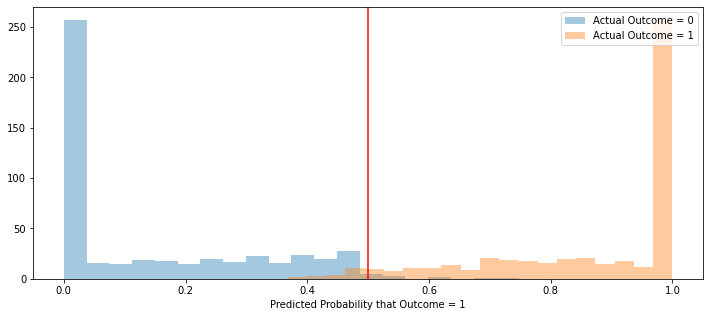

In [74]:
plt.figure(figsize = (12, 5))

# code from classification metrics lecture ii
for group in pred4_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = [f'Actual Outcome = {group[0]}'])

plt.axvline(y.mean(), color='r')
plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

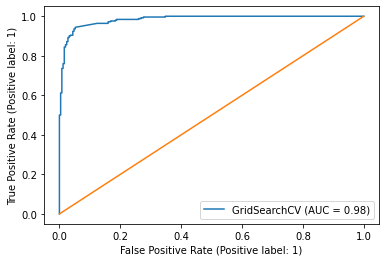

In [75]:
# ROC curve for Model 4
metrics.plot_roc_curve(gs4, X_test, y_test)
# worst case scenario line
plt.plot([0,1], [0,1], label='Baseline');

---

### Model 5 - Decision Tree with CountVectorizer

In [76]:
pipe5 = Pipeline([
    ('cvec', CountVectorizer()),
    ('dt', DecisionTreeClassifier())
])

In [77]:
params5 = {
    'cvec__min_df': [2],
    'cvec__max_df': [.2],
    'cvec__binary': [True],
    'cvec__stop_words': ['english'],
    'dt__random_state': [10],
    'dt__min_samples_split': [5, 6, 7, 8, 9, 10]
}

In [78]:
gs5 = GridSearchCV(pipe5, param_grid=params5)
gs5.fit(X_train, y_train)
print(gs5.best_score_)
gs5.best_params_

0.8726666666666667


{'cvec__binary': True,
 'cvec__max_df': 0.2,
 'cvec__min_df': 2,
 'cvec__stop_words': 'english',
 'dt__min_samples_split': 8,
 'dt__random_state': 10}

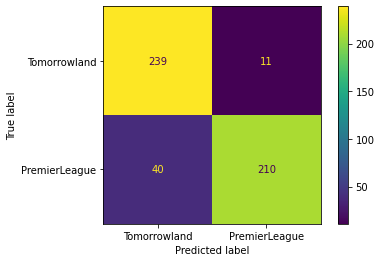

In [79]:
cm5 = metrics.plot_confusion_matrix(gs5, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])
plt.show(cm5)

In [80]:
preds5 = gs5.predict(X_test)
tn5, fp5, fn5, tp5 = metrics.confusion_matrix(y_test, preds5).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland titles?**

In [81]:
tn5 / (tn5 + fp5)   # Model was very good at predicting subreddit if title came from Tomorrowland

0.956

**Sensitivity - How good did the model perform at predicting Premier League titles?**

In [82]:
tp5 / (tp5 + fn5)   # Model was not as good at predicting subreddit if title came from Premier League

0.84

In [83]:
preds5 = gs5.predict(X_test)
X_test[(y_test != preds5) & (preds5 == 0)].head(40)

1778                           Someone explain this to me
1605                     Online Career Mode - FIFA 22 XB1
1571                      Breakdown of annual squad wages
1024    Ward-prowse, TAA, and Maddison, who are you ta...
1295                              Proper baller. Deserved
1919                       Please subscribe to my channel
1641                                    Pretty much this!
1038                        Are fan channels independent?
1797                               Heung-min Son or Kane?
1228    A commanding performance or a open-ended thril...
1459    Which are the most unexpected signings in rece...
1409                                    I'm fed up of FSG
1317    Seems you lot appreciated the last one I poste...
1074                                      Switching Clubs
1954                                         Need a chant
1928      What is happening at the RED side of Manchester
1214                             Can someone explain ffp?
1536    'Bad, 

In [84]:
X_test[(y_test != preds5) & (preds5 == 1)].head(11)

686    Let's gooooo!!!! Finally something to look for...
805    The best time of my life deserves to be on my ...
987    I have a Week 2 Global Journey Package availab...
267    One of the best ways to watch: with Philips Hu...
738            Some of the best memories of my lifetyme!
339    Anyone Know what camping is dis? I've never se...
645                 La música es vida- The music is life
64                                    Best treasure case
410    Workin' on my stage Name for 2024. Lmk what yo...
418            Can I stay the entire week at dreamville?
561    [OFFER] 20€ FOR YOU + 20€ FOR YOUR FRIEND! (MA...
Name: title, dtype: object

In [85]:
pred5_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': gs5.predict_proba(X_test)[:,1]})

pred5_df.head()

,true_values,pred_probs
1370,1,1.000000
654,0,0.000000
1778,1,0.222222
646,0,0.000000
1171,1,1.000000


C:\Users\ao322\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


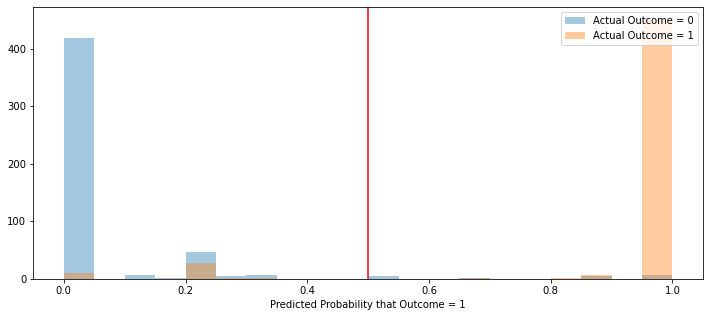

In [86]:
plt.figure(figsize = (12, 5))

# code from classification metrics lecture ii
for group in pred5_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = [f'Actual Outcome = {group[0]}'])

plt.axvline(y.mean(), color='r')
plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

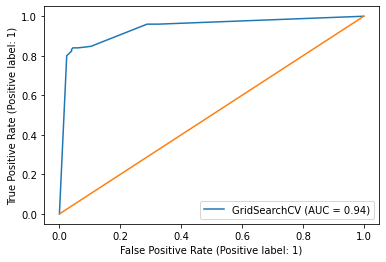

In [87]:
# ROC curve for Model 5
metrics.plot_roc_curve(gs5, X_test, y_test)
# worst case scenario line
plt.plot([0,1], [0,1], label='Baseline');

---

### Model 6 - Decision Tree with TFIDF

In [88]:
pipe6 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('dt', DecisionTreeClassifier())
])

In [89]:
params6 = {
    'tvec__stop_words': ['english'],
    'tvec__min_df': [4],
    'tvec__max_df': [.2],
    'tvec__ngram_range': [(1,1)],
    'dt__random_state': [42],
    'dt__min_samples_split': [9]
}

In [90]:
gs6 = GridSearchCV(pipe6, param_grid=params6)
gs6.fit(X_train, y_train)
print(gs6.best_score_)
gs6.best_params_

0.8713333333333333


{'dt__min_samples_split': 9,
 'dt__random_state': 42,
 'tvec__max_df': 0.2,
 'tvec__min_df': 4,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': 'english'}

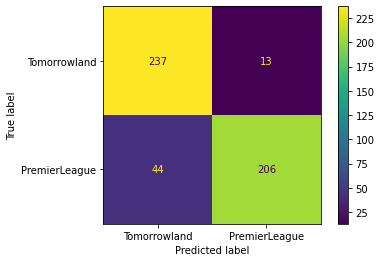

In [91]:
cm6 = metrics.plot_confusion_matrix(gs6, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])
plt.show(cm6)

In [92]:
preds6 = gs6.predict(X_test)
tn6, fp6, fn6, tp6 = metrics.confusion_matrix(y_test, preds6).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland titles?**

In [93]:
tn6 / (tn6 + fp6)   # Model was very good at predicting subreddit if title came from Tomorrowland

0.948

**Sensitivity - How good did the model perform at predicting Premier League titles?**

In [94]:
tp6 / (tp6 + fn6)   # Model was not as good at predicting subreddit if title came from Premier League

0.824

In [95]:
preds6 = gs6.predict(X_test)
X_test[(y_test != preds6) & (preds6 == 0)].head(44)

1778                           Someone explain this to me
1571                      Breakdown of annual squad wages
1024    Ward-prowse, TAA, and Maddison, who are you ta...
1295                              Proper baller. Deserved
1919                       Please subscribe to my channel
1641                                    Pretty much this!
1797                               Heung-min Son or Kane?
1228    A commanding performance or a open-ended thril...
1459    Which are the most unexpected signings in rece...
1290    Former wonder kids who failed to live up to th...
1409                                    I'm fed up of FSG
1317    Seems you lot appreciated the last one I poste...
1074                                      Switching Clubs
1954                                         Need a chant
1928      What is happening at the RED side of Manchester
1050    A video providing a surface level breakdown of...
1214                             Can someone explain ffp?
1068    How do

In [96]:
X_test[(y_test != preds6) & (preds6 == 1)].head(13)

504                            Good luck getting refunds
982    I get the chills evrytime I find this photo.. ...
805    The best time of my life deserves to be on my ...
276    Cheers from Australia, can't wait to be there ...
267    One of the best ways to watch: with Philips Hu...
389    How it the festival next year safer than that?...
339    Anyone Know what camping is dis? I've never se...
242    Anyone having Streaming Problems with the Replay?
847                                   Good time at B.Eat
410    Workin' on my stage Name for 2024. Lmk what yo...
857                What happened with the Chainsmokers??
418            Can I stay the entire week at dreamville?
241          Thinking about 2022. 12 months and counting
Name: title, dtype: object

In [97]:
pred6_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': gs6.predict_proba(X_test)[:,1]})

pred6_df.head()

,true_values,pred_probs
1370,1,1.0000
654,0,0.0000
1778,1,0.3125
646,0,0.0000
1171,1,1.0000


C:\Users\ao322\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


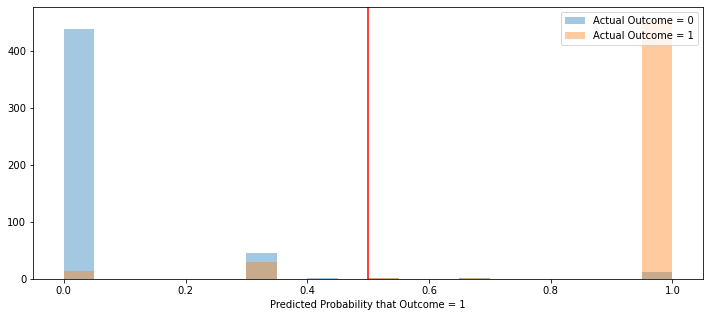

In [98]:
plt.figure(figsize = (12, 5))

# code from classification metrics lecture ii
for group in pred6_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = [f'Actual Outcome = {group[0]}'])

plt.axvline(y.mean(), color='r')
plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

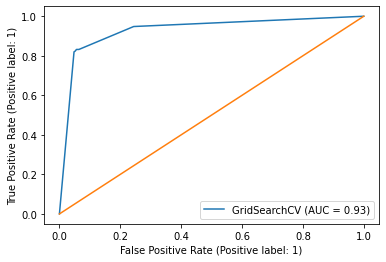

In [99]:
# ROC curve for Model 6
metrics.plot_roc_curve(gs6, X_test, y_test)
# worst case scenario line
plt.plot([0,1], [0,1], label='Baseline');

---

### Model 7 - RandomForest with CountVectorizer

In [100]:
pipe7 = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

In [101]:
params7 = {
    'cvec__min_df': [1, 2],
    'cvec__max_df': [.1, .2],
    'cvec__binary': [False],
    'cvec__stop_words': ['english'],
    'rf__random_state': [42]
}

In [102]:
gs7 = GridSearchCV(pipe7, param_grid=params7)
gs7.fit(X_train, y_train)
print(gs7.best_score_)
gs7.best_params_

0.8846666666666667


{'cvec__binary': False,
 'cvec__max_df': 0.2,
 'cvec__min_df': 1,
 'cvec__stop_words': 'english',
 'rf__random_state': 42}

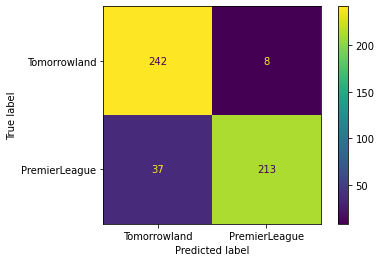

In [103]:
cm7 = metrics.plot_confusion_matrix(gs7, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])
plt.show(cm7)

In [104]:
preds7 = gs7.predict(X_test)
tn7, fp7, fn7, tp7 = metrics.confusion_matrix(y_test, preds7).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland titles?**

In [105]:
tn7 / (tn7 + fp7)    # Model was very good at predicting subreddit if title came from Tomorrowland

0.968

**Sensitivity - How good did the model perform at predicting Premier League titles?**

In [106]:
tp7 / (tp7 + fn7)   # Model was not as good at predicting subreddit if title came from Premier League

0.852

In [107]:
preds7 = gs7.predict(X_test)
X_test[(y_test != preds7) & (preds7 == 0)].head(37)

1778                           Someone explain this to me
1605                     Online Career Mode - FIFA 22 XB1
1571                      Breakdown of annual squad wages
1024    Ward-prowse, TAA, and Maddison, who are you ta...
1295                              Proper baller. Deserved
1919                       Please subscribe to my channel
1641                                    Pretty much this!
1981                                                Salah
1228    A commanding performance or a open-ended thril...
1459    Which are the most unexpected signings in rece...
1290    Former wonder kids who failed to live up to th...
1409                                    I'm fed up of FSG
1317    Seems you lot appreciated the last one I poste...
1954                                         Need a chant
1214                             Can someone explain ffp?
1536    'Bad, very bad indeed' - Italian media denounc...
1269          Who remembers this classic Redknapp moment?
1626          

In [108]:
X_test[(y_test != preds7) & (preds7 == 1)].head(8)

821    I really hope Martin Garrix features whoever m...
270                                     Change time zone
805    The best time of my life deserves to be on my ...
492                          Time to make legal steps...
267    One of the best ways to watch: with Philips Hu...
847                                   Good time at B.Eat
64                                    Best treasure case
418            Can I stay the entire week at dreamville?
Name: title, dtype: object

In [109]:
pred7_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': gs7.predict_proba(X_test)[:,1]})

pred7_df.head()

,true_values,pred_probs
1370,1,0.970000
654,0,0.410000
1778,1,0.201599
646,0,0.096352
1171,1,1.000000


C:\Users\ao322\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


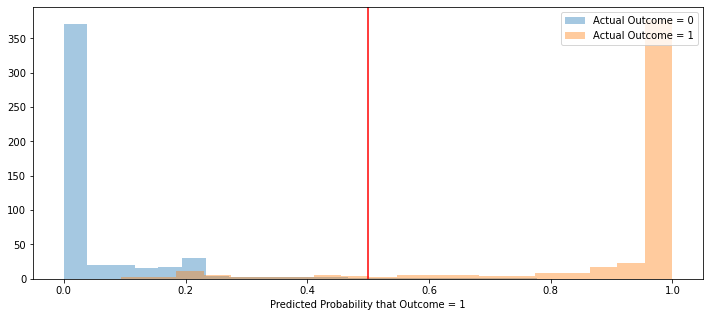

In [110]:
plt.figure(figsize = (12, 5))

# code from classification metrics lecture ii
for group in pred7_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = [f'Actual Outcome = {group[0]}'])

plt.axvline(y.mean(), color='r')
plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

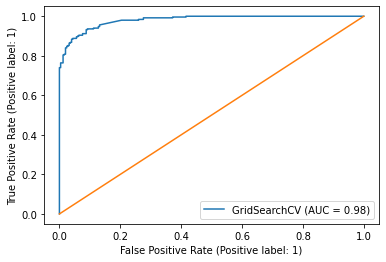

In [111]:
# ROC curve for Model 7
metrics.plot_roc_curve(gs7, X_test, y_test)
# worst case scenario line
plt.plot([0,1], [0,1], label='Baseline');

---

### Model 8 - RandomForest with TFIDF

In [112]:
pipe8 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

In [113]:
params8 = {
    'tvec__stop_words': [None, 'english'],
    'tvec__min_df': [1, 2, 3, 4, 5],
    'tvec__max_df': [.2, .3, .4],
    'tvec__ngram_range': [(1,1), (1,2)],
    'rf__random_state': [42]
}

In [114]:
gs8 = GridSearchCV(pipe8, param_grid=params8)
gs8.fit(X_train, y_train)
print(gs8.best_score_)
gs8.best_params_

0.8879999999999999


{'rf__random_state': 42,
 'tvec__max_df': 0.2,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': 'english'}

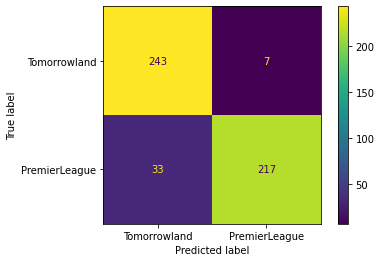

In [115]:
cm8 = metrics.plot_confusion_matrix(gs8, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])
plt.show(cm8)

In [116]:
preds8 = gs8.predict(X_test)
tn8, fp8, fn8, tp8 = metrics.confusion_matrix(y_test, preds8).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland titles?**

In [117]:
tn8 / (tn8 + fp8)    # Model was very good at predicting subreddit if title came from Tomorrowland

0.972

**Sensitivity - How good did the model perform at predicting Premier League titles?**

In [118]:
tp8 / (tp8 + fn8)   # Model was good but not as good at predicting subreddit if title came from Premier League

0.868

In [119]:
preds8 = gs8.predict(X_test)
X_test[(y_test != preds8) & (preds8 == 0)].head(33)

1778                           Someone explain this to me
1605                     Online Career Mode - FIFA 22 XB1
1571                      Breakdown of annual squad wages
1024    Ward-prowse, TAA, and Maddison, who are you ta...
1295                              Proper baller. Deserved
1919                       Please subscribe to my channel
1641                                    Pretty much this!
1228    A commanding performance or a open-ended thril...
1459    Which are the most unexpected signings in rece...
1290    Former wonder kids who failed to live up to th...
1409                                    I'm fed up of FSG
1317    Seems you lot appreciated the last one I poste...
1954                                         Need a chant
1214                             Can someone explain ffp?
1269          Who remembers this classic Redknapp moment?
1626                                     Pure masterclass
1253    'I am not sure what the plan is' - why are Eve...
1328          

In [120]:
X_test[(y_test != preds8) & (preds8 == 1)].head(7)

805    The best time of my life deserves to be on my ...
492                          Time to make legal steps...
267    One of the best ways to watch: with Philips Hu...
738            Some of the best memories of my lifetyme!
847                                   Good time at B.Eat
64                                    Best treasure case
418            Can I stay the entire week at dreamville?
Name: title, dtype: object

In [121]:
pred8_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs': gs8.predict_proba(X_test)[:,1]})

pred8_df.head()

,true_values,pred_probs
1370,1,0.950000
654,0,0.370000
1778,1,0.184709
646,0,0.172906
1171,1,1.000000


C:\Users\ao322\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


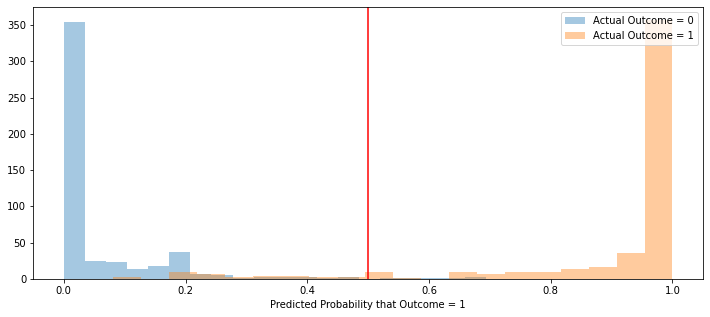

In [122]:
plt.figure(figsize = (12, 5))

# code from classification metrics lecture ii
for group in pred8_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = [f'Actual Outcome = {group[0]}'])

plt.axvline(y.mean(), color='r')
plt.xlabel('Predicted Probability that Outcome = 1')
plt.legend();

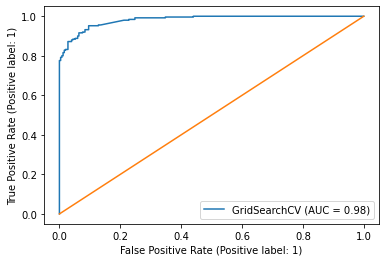

In [123]:
# ROC curve for Model 8
metrics.plot_roc_curve(gs8, X_test, y_test)
# worst case scenario line
plt.plot([0,1], [0,1], label='Baseline');

---

# Analysis

### EDA

*Premier League titles seemed to be longer than Tomorrowland titles based on total title length and title word count.  Could be signal for model to help predict between the two subreddits.*

*In looking at top title words between the two subreddits, there was not much overlap with top title words of one subreddit showing up in top title words of the other subreddit.  Should make it easier for models to predict between the two subreddits.*

---

### Model Analysis

*All models were able to predict the correct subreddit with accuracies ranging from 83% to 91%, so they were all good models.  Also, verified that models were good based on ROC curves that all had AUC's at or above a 0.88.*

*In every model except the KNN with tfidfvectorizer, the Tomorrowland subreddit was predicted much more than the Premier League subreddit which led higher specificities than sensitivities in those models.*

*When reviewing some of the incorrectly predicted titles, there seem to be a lot of the top words from the other subreddit that could possibly be the reason for the incorrect predictions.  The Tomorrowland titles tended to have more top words that were also frequently in Premier League titles which could be the reason that Tomorrowland was predicted more than Premier League consistently.*

*Although, I didn't calculate them it is clear that precision scores are also very high for each model except the KNN with tfidfvectorizer based on the small amounts of false positives in those models.*

*The logistic regression model with the tfidfvectorizer was the most accurate model and was able to predict the correct subreddit based on the title with an accuracy of 91%.*

*The KNN with the countvectorizer was the least accurate model correctly predicting the subreddit the title came from 83% of the time.*

*In all of the models the tfidfvectorizer and the countvectorizer gave similar scores.  Scoring vs. counting words in subreddit titles didn't seem to impact the models very much.*

---